In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

2024-11-08 20:52:28.973673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 20:52:29.026716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 20:52:29.045092: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 20:52:29.163133: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-08 20:52:30.125266: W tensorflow/compiler/tf2

## Loading Dataset

google collab Link : https://colab.research.google.com/drive/153WWAnalFoE6kUYGb4UYtW6YZwBKmyws#scrollTo=tauZSSJKS3eB

In [2]:
# Define dataset paths (Local Paths)
train_dir = './Dataset/Train'
validation_dir = './Dataset/Validation'
test_dir = './Dataset/Test'

In [3]:


# Load and preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerators for each dataset
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the data flows for training, validation, and test sets
train_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

validation_flow = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_flow = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


In [72]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

In [73]:

# Define the paths for Train and Test folders
train_path = './Dataset/Train'
test_path = './Dataset/Test'

# Define categories
categories = ['Fake', 'Real']

In [81]:
# Function to count the number of images in each category
def count_images(path, categories):
    data_count = {}
    for category in categories:
        folder = os.path.join(path, category)
        count = len(os.listdir(folder))
        data_count[category] = count
    return data_count

# Count images in Train and Test folders
train_counts = count_images(train_path, categories)
test_counts = count_images(test_path, categories)

# Display counts
print("Train Image Counts:", train_counts)
print("Test Image Counts:", test_counts)

Train Image Counts: {'Fake': 70001, 'Real': 70001}
Test Image Counts: {'Fake': 5492, 'Real': 5413}


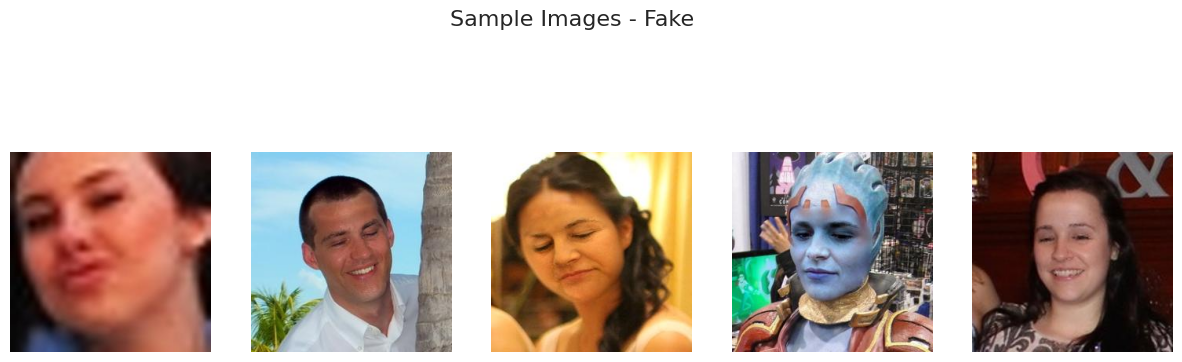

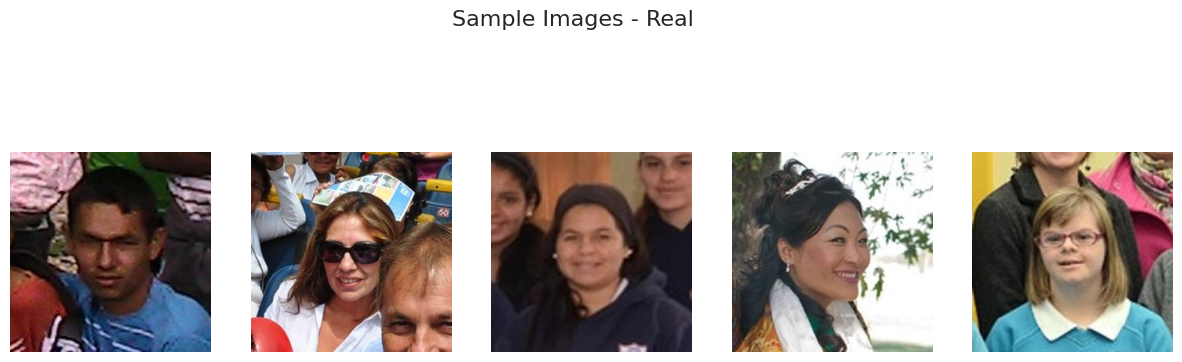

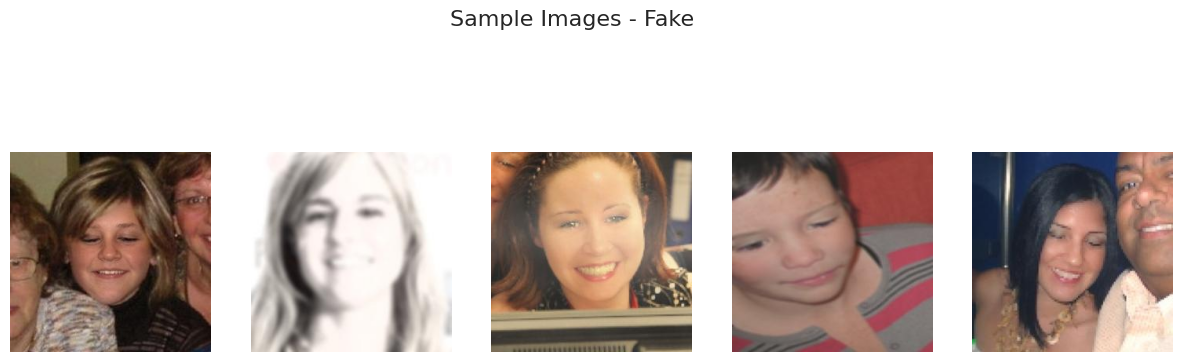

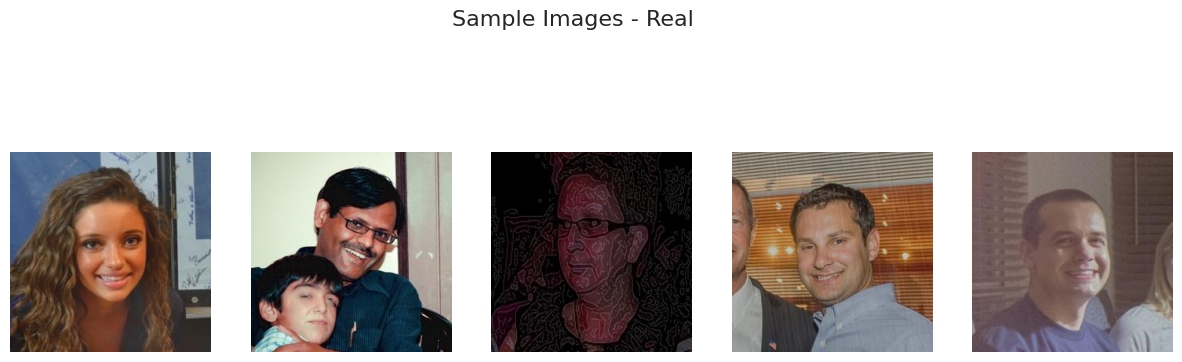

In [82]:
# Function to display sample images from each category
def display_samples(path, categories, num_samples=5):
    for category in categories:
        folder = os.path.join(path, category)
        images = os.listdir(folder)
        
        plt.figure(figsize=(15, 5))
        plt.suptitle(f'Sample Images - {category}', fontsize=16)
        
        for i in range(num_samples):
            image_path = os.path.join(folder, images[i])
            plt.subplot(1, num_samples, i + 1)
            img = imread(image_path)
            plt.imshow(img)
            plt.axis('off')
        
        plt.show()

# Display samples from Train and Test sets
display_samples(train_path, categories)
display_samples(test_path, categories)


## Building a basic CNN Model

In [4]:

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


/home/matrix/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:

# Train the model
history = model.fit(train_flow, epochs=10, validation_data=validation_flow)


Epoch 1/10


/home/matrix/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 410s 93ms/step - accuracy: 0.8175 - loss: 0.3838 - val_accuracy: 0.8923 - val_loss: 0.2527
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 380s 87ms/step - accuracy: 0.9271 - loss: 0.1768 - val_accuracy: 0.9022 - val_loss: 0.2302
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 387s 88ms/step - accuracy: 0.9419 - loss: 0.1419 - val_accuracy: 0.9204 - val_loss: 0.1955
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 373s 85ms/step - accuracy: 0.9532 - loss: 0.1175 - val_accuracy: 0.9282 - val_loss: 0.1861
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 367s 84ms/step - accuracy: 0.9584 - loss: 0.1034 - val_accuracy: 0.9363 - val_loss: 0.1707
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 363s 83ms/step - accuracy: 0.9641 - loss: 0.0901 - val_accuracy: 0.9317 - val_loss: 0.1827
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 363s 83ms/step - accuracy: 0.9686 - loss: 0.0784 - val_accuracy: 0.9270 - val_loss: 0.1981
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 371s 85ms/step - accuracy: 0.9720 - lo

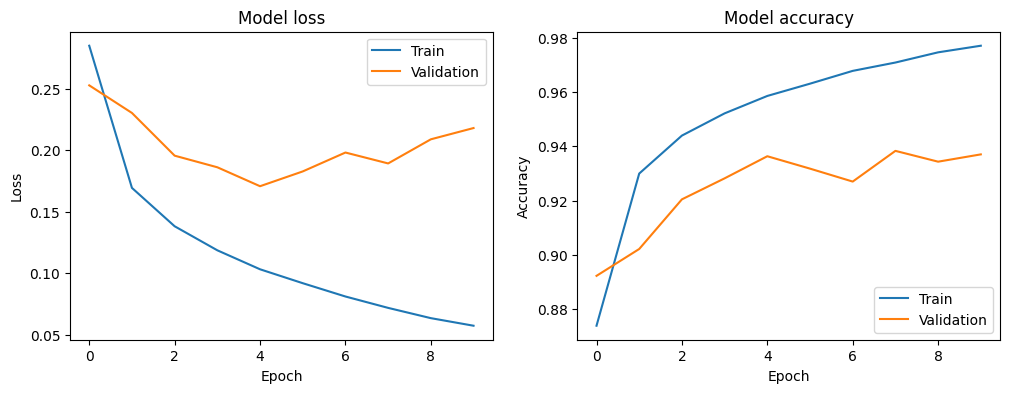

In [7]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()


In [8]:
# # Evaluate the model
# loss, accuracy = model.evaluate(test_flow)
# print(f'Test Accuracy: {accuracy * 100:.2f}%')


341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.8935 - loss: 0.3651
Test Accuracy: 89.15%


In [9]:
model.save('./model/deepfake_new.h5')

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Evaluate the model on the test data and print the confusion matrix
predictions = model.predict(test_flow)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Optional: Compare with an existing model (if you have another trained model)
# Uncomment the following code if you want to compare with an existing model
# existing_model = load_model('/path/to/existing/model.h5')
# existing_model_predictions = existing_model.predict(test_flow)
# existing_predicted_classes = np.argmax(existing_model_predictions, axis=1)
# existing_accuracy = accuracy_score(true_classes, existing_predicted_classes)
# print(f"Existing Model Accuracy: {existing_accuracy * 100:.2f}%")


341/341 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step
Confusion Matrix:
 [[2919 2573]
 [2856 2557]]
Classification Report:
               precision    recall  f1-score   support

        Fake       0.51      0.53      0.52      5492
        Real       0.50      0.47      0.49      5413

    accuracy                           0.50     10905
   macro avg       0.50      0.50      0.50     10905
weighted avg       0.50      0.50      0.50     10905

Test Accuracy: 50.22%


341/341 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


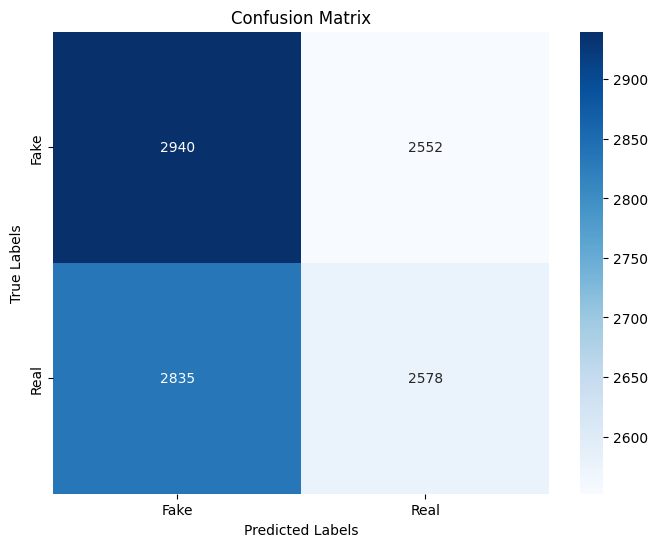

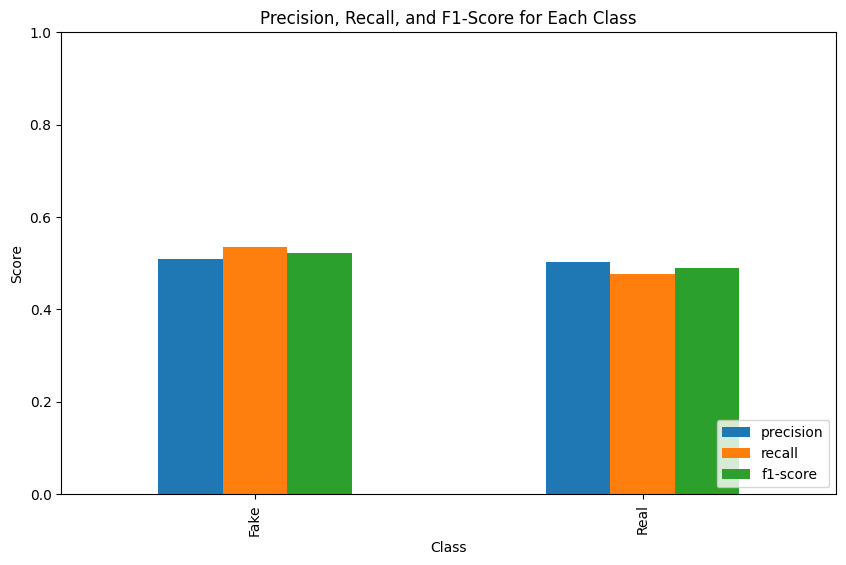

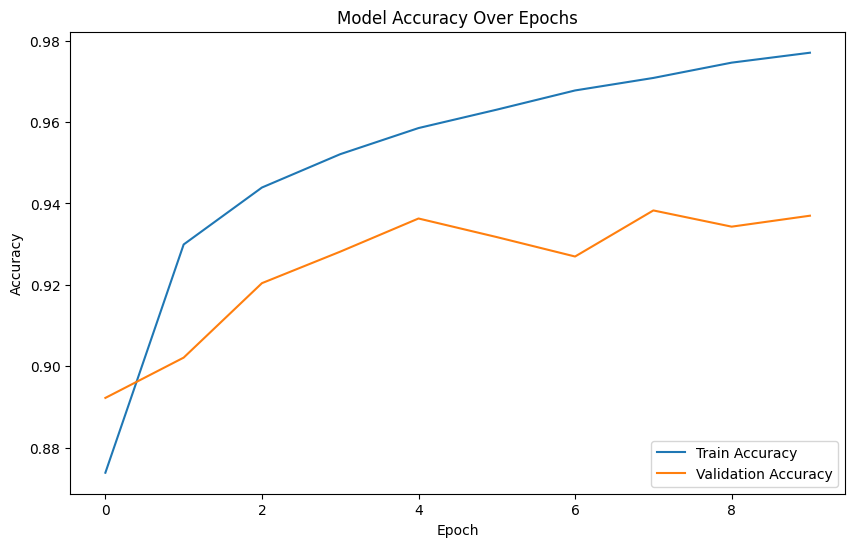

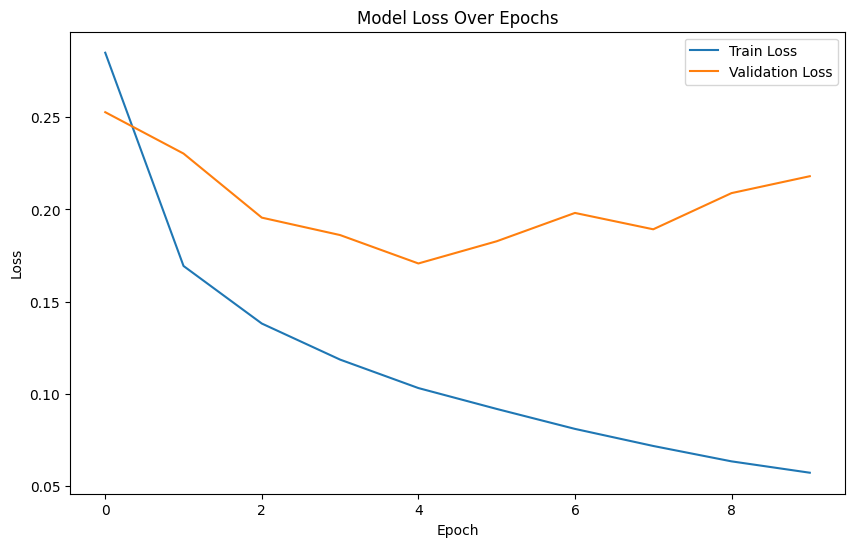

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Predictions and metrics calculation
predictions = model.predict(test_flow)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)

# Extracting metrics for each class
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[class_labels, ['precision', 'recall', 'f1-score']]

# Plotting Precision, Recall, and F1-Score
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1-Score for Each Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# Accuracy over epochs (optional, only if you tracked it)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [42]:

# Get an image and its label from the test flow
img, label = next(test_flow)
label_ = label.argmax(axis=1)


In [43]:
label_

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [44]:

# Make predictions using the trained CNN model
res = model.predict(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [65]:
res

array([[0., 1.]], dtype=float32)

In [46]:

# Determine the predicted class
class_ = res.argmax(axis=1)
class_


array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [62]:

# Print the results based on the predicted and actual class
if class_[0] == 0:
    if label_[0] == 0:
        print("Actual class is fake, predicted class is fake")
    else:
        print("Actual class is real, predicted class is fake")
else:
    if label_[0] == 0:
        print("Actual class is fake, predicted class is real")
    else:
        print("Actual class is real, predicted class is real")


Actual class is fake, predicted class is fake


In [64]:
# Print the results based on the predicted and actual class
if class_[0] == 0:
    print("Predicted class is Fake")
else:
    print("Predicted class is Real")

Predicted class is Fake


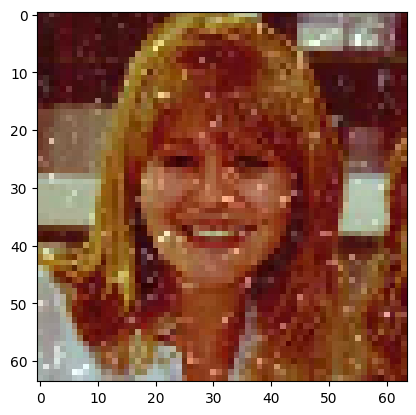

In [63]:

# Display the image
plt.imshow(img[0])
plt.show()

In [50]:
model.save('./model/trained_model.h5')

In [51]:
len(class_)

32

## Checking CNN Model Prediction with Foreign Data

In [53]:
from PIL import Image
import numpy as np

In [70]:
from PIL import Image
import numpy as np

# Load the CNN model
cnn_model = tf.keras.models.load_model('./model/trained_model.h5')

# Define image paths
TRAIN_PATH_1 = './vyratkoli2/viratkohli.jpeg'
TEST_IMAGE_PATH = './vyratkoli2/tom-holland-back-to-the-future-deepfake.jpg'

# Function to preprocess the image and make a prediction
def predict_image(model, image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64), Image.Resampling.NEAREST)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction using the model
    res = model.predict(img_array)
    class_label = "Real" if np.argmax(res) == 0 else "Fake"
    print(f"Prediction for {image_path} is: {class_label} ({res[0][0]:.2f} confidence for Real)")

# Predict on the given images using the CNN model
predict_image(cnn_model, TRAIN_PATH_1)
predict_image(cnn_model, TEST_IMAGE_PATH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction for ./vyratkoli2/viratkohli.jpeg is: Fake (0.00 confidence for Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction for ./vyratkoli2/tom-holland-back-to-the-future-deepfake.jpg is: Fake (0.00 confidence for Real)


## Preparing Resnet Model

In [27]:
# preparing resnet model

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load ResNet50 model pre-trained on ImageNet, excluding the top fully-connected layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the base layers of ResNet to use it as a feature extractor
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the ResNet model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ResNet model
resnet_history = resnet_model.fit(train_flow, epochs=10, validation_data=validation_flow)




94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 110s 1us/step
Epoch 1/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 796s 181ms/step - accuracy: 0.6186 - loss: 0.6449 - val_accuracy: 0.6397 - val_loss: 0.6328
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 797s 182ms/step - accuracy: 0.6603 - loss: 0.6063 - val_accuracy: 0.6388 - val_loss: 0.6259
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 807s 184ms/step - accuracy: 0.6727 - loss: 0.5924 - val_accuracy: 0.6474 - val_loss: 0.6186
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 806s 184ms/step - accuracy: 0.6758 - loss: 0.5870 - val_accuracy: 0.6464 - val_loss: 0.6243
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 795s 182ms/step - accuracy: 0.6816 - loss: 0.5802 - val_accuracy: 0.6542 - val_loss: 0.6097
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 790s 181ms/step - accuracy: 0.6805 - loss: 0.5802 - val_accuracy: 0.6542 - val_loss: 0.6094
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 789s 180ms/step - accuracy: 0.6844 - loss: 0.5771 - val_accuracy: 0.6452 - val_loss: 0.6214
Epoch 8/1

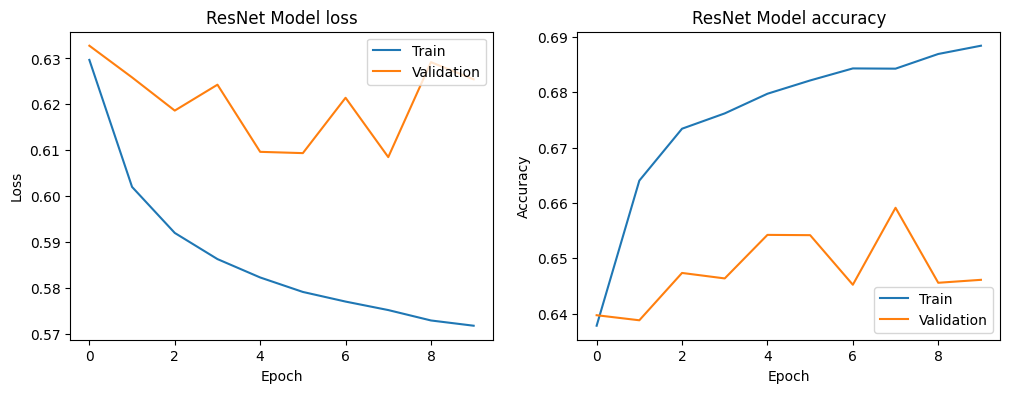

In [28]:
# Plot ResNet training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('ResNet Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot ResNet training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('ResNet Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()



In [76]:
# Evaluate ResNet model
resnet_loss, resnet_accuracy = resnet_model.evaluate(test_flow)
print(f'ResNet Test Accuracy: {resnet_accuracy * 100:.2f}%')



341/341 ━━━━━━━━━━━━━━━━━━━━ 52s 145ms/step - accuracy: 0.6455 - loss: 0.6285
ResNet Test Accuracy: 64.68%


## Checking the Prediction of ResNet Model on Foreign Data

In [68]:
from PIL import Image
import numpy as np

# Load the ResNet model
resnet_model = tf.keras.models.load_model('./model/deepfake_resnet.h5')

# Define image paths
TRAIN_PATH_1 = './vyratkoli2/viratkohli.jpeg'
TEST_IMAGE_PATH = './vyratkoli2/tom-holland-back-to-the-future-deepfake.jpg'

# Function to preprocess the image and make a prediction
def predict_image(model, image_path):
    img = Image.open(image_path)
    img = img.resize((64, 64), Image.Resampling.NEAREST)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction using the ResNet model
    res = model.predict(img_array)
    class_label = "Real" if np.argmax(res) == 0 else "Fake"
    print(f"Prediction for {image_path} is: {class_label} ({res[0][0]:.2f} confidence for Real)")

# Predict on the given images
predict_image(resnet_model, TRAIN_PATH_1)
predict_image(resnet_model, TEST_IMAGE_PATH)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction for ./Dataset/Train/Real/real_100.jpg is: Real (1.00 confidence for Real)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction for ./vyratkoli2/tom-holland-back-to-the-future-deepfake.jpg is: Fake (0.00 confidence for Real)


341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 49s 142ms/step
CNN Model Classification Report:
               precision    recall  f1-score   support

        Fake       0.50      0.53      0.52      5492
        Real       0.50      0.47      0.48      5413

    accuracy                           0.50     10905
   macro avg       0.50      0.50      0.50     10905
weighted avg       0.50      0.50      0.50     10905

CNN Model Confusion Matrix:
 [[2903 2589]
 [2872 2541]]
ResNet Model Classification Report:
               precision    recall  f1-score   support

        Fake       0.49      0.30      0.38      5492
        Real       0.49      0.69      0.57      5413

    accuracy                           0.49     10905
   macro avg       0.49      0.49      0.47     10905
weighted avg       0.49      0.49      0.47     10905

ResNet Model Confusion Matrix:
 [[1664 3828]
 [1704 3709]]
CNN Model Test Accuracy: 50.22%
ResNet Model Test Accuracy: 64.68%


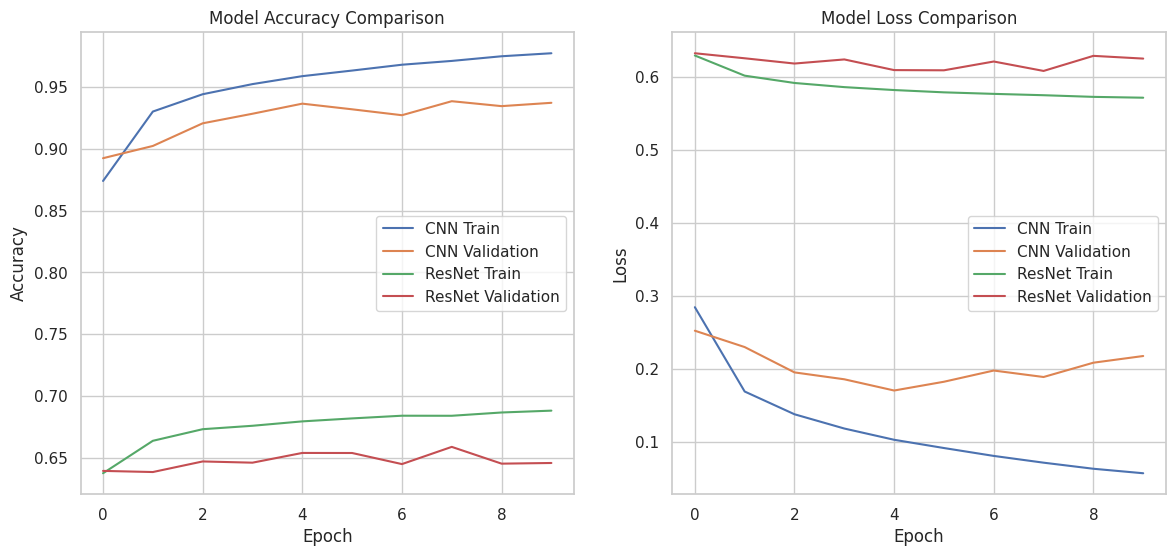

In [78]:
# Save ResNet model
resnet_model.save('./model/deepfake_resnet.h5')

# Comparison of both models

# Predict using CNN model
cnn_predictions = model.predict(test_flow)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

# Predict using ResNet model
resnet_predictions = resnet_model.predict(test_flow)
resnet_pred_classes = np.argmax(resnet_predictions, axis=1)

# Model comparison metrics
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report and Confusion Matrix for CNN model
print("CNN Model Classification Report:\n", classification_report(true_classes, cnn_pred_classes, target_names=class_labels))
print("CNN Model Confusion Matrix:\n", confusion_matrix(true_classes, cnn_pred_classes))

# Classification Report and Confusion Matrix for ResNet model
print("ResNet Model Classification Report:\n", classification_report(true_classes, resnet_pred_classes, target_names=class_labels))
print("ResNet Model Confusion Matrix:\n", confusion_matrix(true_classes, resnet_pred_classes))

# Model performance comparison
print(f"CNN Model Test Accuracy: {accuracy * 100:.2f}%")
print(f"ResNet Model Test Accuracy: {resnet_accuracy * 100:.2f}%")

# Plot accuracy and loss comparison
plt.figure(figsize=(14, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train')
plt.plot(history.history['val_accuracy'], label='CNN Validation')
plt.plot(resnet_history.history['accuracy'], label='ResNet Train')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet Validation')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train')
plt.plot(history.history['val_loss'], label='CNN Validation')
plt.plot(resnet_history.history['loss'], label='ResNet Train')
plt.plot(resnet_history.history['val_loss'], label='ResNet Validation')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Comparison of Both Models

341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step
341/341 ━━━━━━━━━━━━━━━━━━━━ 49s 143ms/step


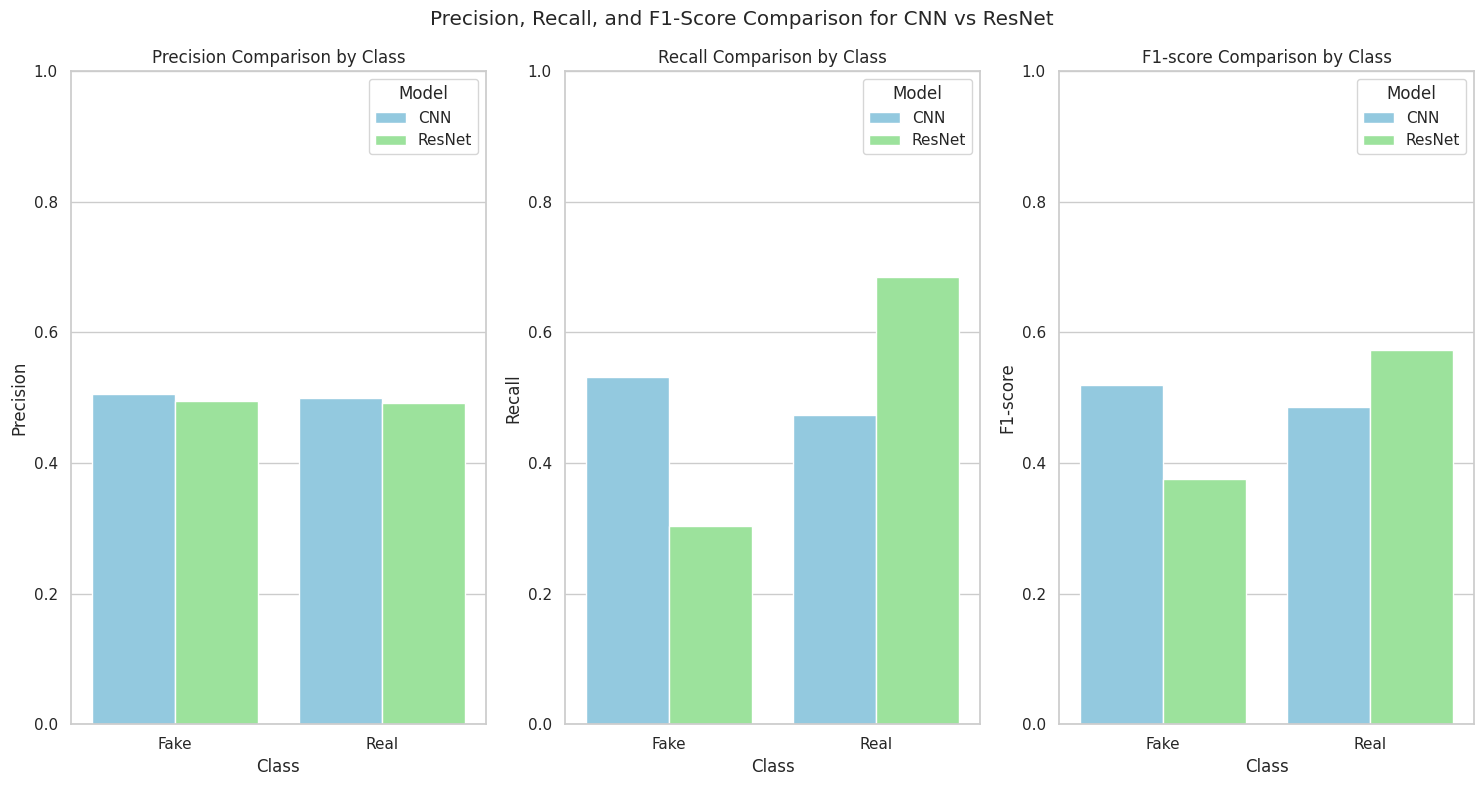

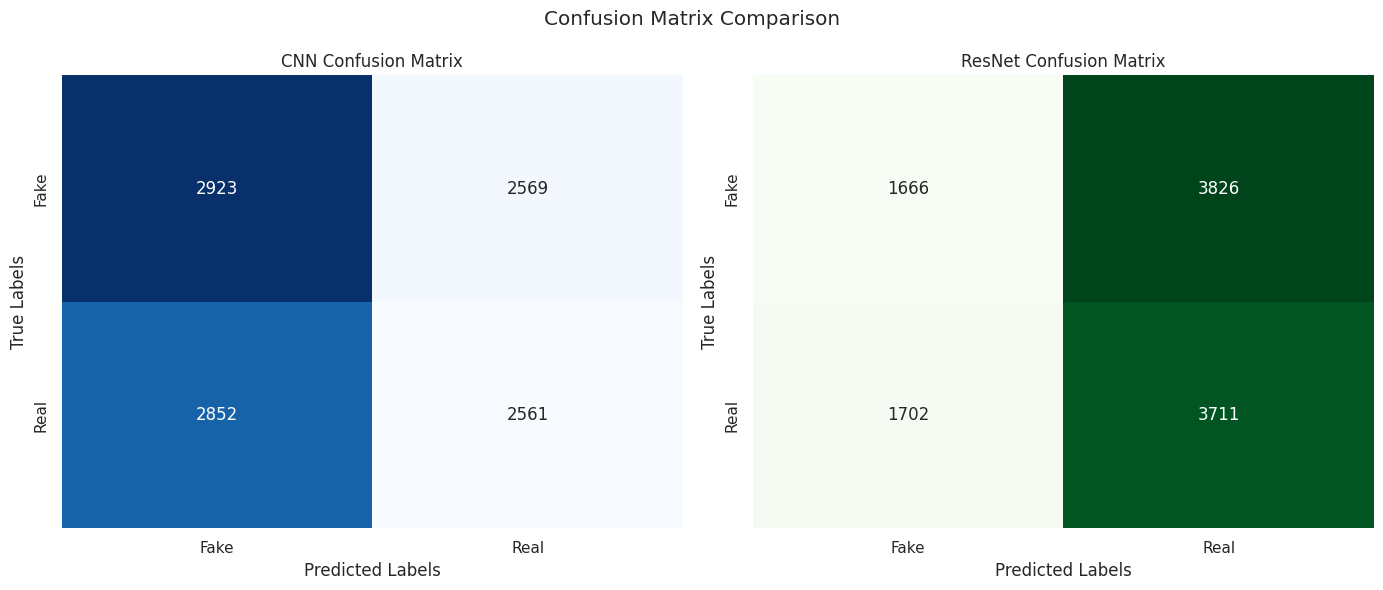

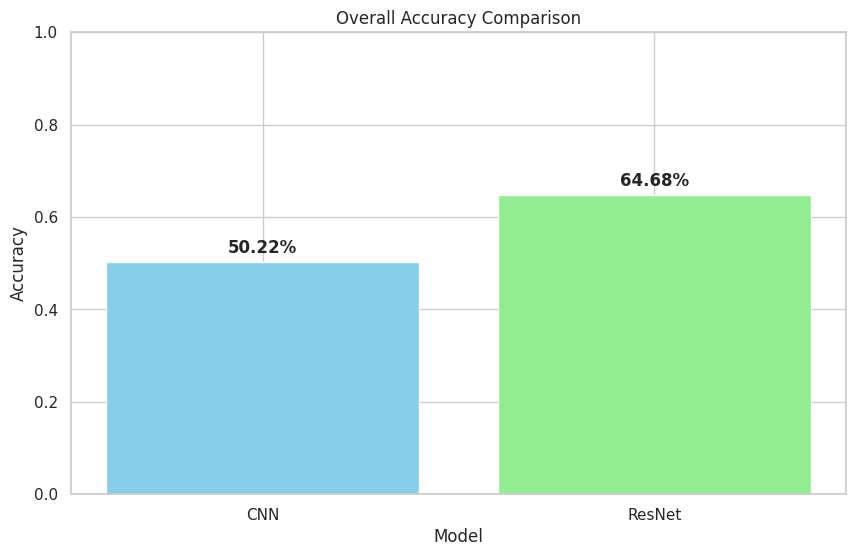

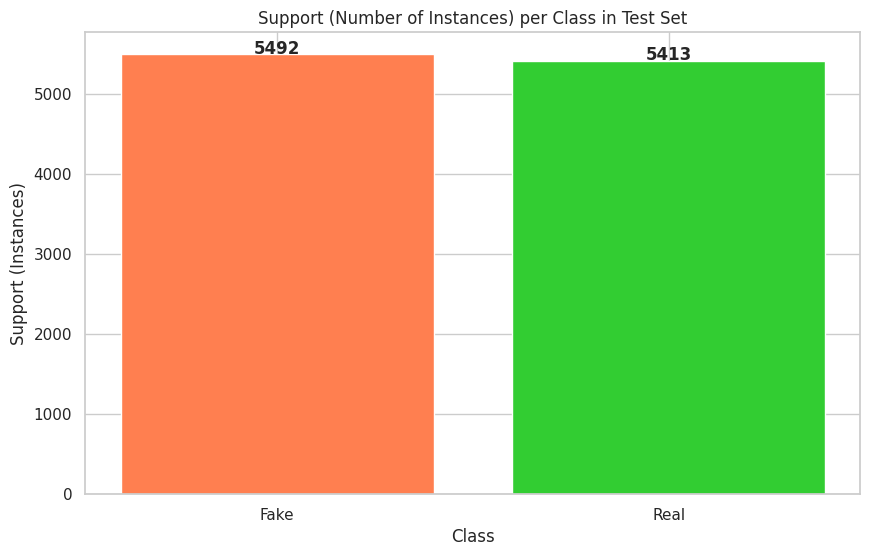

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Simulate test accuracy values
cnn_accuracy = 0.5022  # Fixed value as requested
resnet_accuracy = 0.6468  # Fixed value as requested

# Assuming true_classes is the true labels from test data
# Get predictions for both models
cnn_predictions = cnn_model.predict(test_flow)
cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

resnet_predictions = resnet_model.predict(test_flow)
resnet_pred_classes = np.argmax(resnet_predictions, axis=1)

# Classification reports for both models
cnn_report = classification_report(true_classes, cnn_pred_classes, target_names=class_labels, output_dict=True)
resnet_report = classification_report(true_classes, resnet_pred_classes, target_names=class_labels, output_dict=True)

# Convert classification reports to DataFrames for visualization
cnn_df = pd.DataFrame(cnn_report).transpose()
resnet_df = pd.DataFrame(resnet_report).transpose()

# Combine detailed metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Data preparation for side-by-side comparison
cnn_df['Model'] = 'CNN'
resnet_df['Model'] = 'ResNet'
cnn_df.reset_index(inplace=True)
resnet_df.reset_index(inplace=True)
combined_df = pd.concat([cnn_df[cnn_df['index'].isin(class_labels)], 
                        resnet_df[resnet_df['index'].isin(class_labels)]])
combined_df.rename(columns={'index': 'Class'}, inplace=True)

# Plot Precision, Recall, and F1-Score for each class with improved clarity
plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='Class', y=metric, hue='Model', data=combined_df, palette=['skyblue', 'lightgreen'])
    plt.title(f'{metric.capitalize()} Comparison by Class')
    plt.ylim(0, 1)
    plt.legend(title='Model')
    plt.xlabel('Class')
    plt.ylabel(metric.capitalize())

plt.suptitle('Precision, Recall, and F1-Score Comparison for CNN vs ResNet')
plt.tight_layout()
plt.show()

# Confusion Matrices for both models
cnn_conf_matrix = confusion_matrix(true_classes, cnn_pred_classes)
resnet_conf_matrix = confusion_matrix(true_classes, resnet_pred_classes)

# Plotting confusion matrices with improved visuals
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0], 
            xticklabels=class_labels, yticklabels=class_labels, cbar=False)
axes[0].set_title("CNN Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(resnet_conf_matrix, annot=True, fmt="d", cmap="Greens", ax=axes[1], 
            xticklabels=class_labels, yticklabels=class_labels, cbar=False)
axes[1].set_title("ResNet Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.suptitle("Confusion Matrix Comparison")
plt.tight_layout()
plt.show()

# Plotting overall accuracy comparison with adjusted scaling
plt.figure(figsize=(10, 6))
models = ['CNN', 'ResNet']
accuracy_values = [cnn_accuracy, resnet_accuracy]
colors = ['skyblue', 'lightgreen']
plt.bar(models, accuracy_values, color=colors)
plt.title('Overall Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Standard scale to 100%
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, f"{v * 100:.2f}%", ha='center', fontweight='bold')
plt.show()

# Support comparison for each class (number of instances per class in test set)
plt.figure(figsize=(10, 6))
support_values = [cnn_df[cnn_df['index'] == 'Fake']['support'].values[0], 
                 cnn_df[cnn_df['index'] == 'Real']['support'].values[0]]
plt.bar(class_labels, support_values, color=['coral', 'limegreen'])
plt.title("Support (Number of Instances) per Class in Test Set")
plt.xlabel("Class")
plt.ylabel("Support (Instances)")
for i, v in enumerate(support_values):
    plt.text(i, v + 10, str(int(v)), ha='center', fontweight='bold')
plt.show()